## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Francisco Maiocchi

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


In [149]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML
from scipy.fftpack import fft
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (10,10)

N  = 1000 # muestras
fs = 1000 # Hz

tt = np.linspace(0, (N-1)/fs, N)

df = fs/N
ff = np.linspace(0, int((N-1)*df), int(N))

# Insertar aquí el código para inicializar tu notebook
########################################################
def barlett(N):
    
    k = np.linspace(0, (N-1), N)
    w = (2/(N-1))*((N-1)/2 - np.abs(k-(N-1)/2))
    return w
        
def hann(N):
    
    k = np.linspace(0, (N-1), N)
    w = 0.5*(1 - np.cos((2*np.pi*k)/(N-1)))
    return w
    
def blackman(N):
    
    k = np.linspace(0, (N-1), N)
    w = 0.42 - 0.5*np.cos((2*np.pi*k)/(N - 1)) + 0.08*np.cos((4*np.pi*k)/(N - 1))
    return w
    
def flat_top(N):

    k = np.linspace(0, (N-1), N)
    w = 1 - 1.93*np.cos((2*np.pi*k)/(N - 1)) + 1.29*np.cos((4*np.pi*k)/(N - 1)) - 0.388*np.cos((6*np.pi*k)/(N - 1)) + 0.032*np.cos((8*np.pi*k)/(N - 1))
    w = w/np.max(w)
    return w

def spectrum_analyzer(x, fs, N, plot = True):
    """ 
    
    brief:  Analizador de espectro
    
    x:      Señal en el dominio del tiempo
    fs:     Frecuencia de muestreo
    N:      Cantidad de muestras de la señal
    plot = True -> Se genera una figure con el espectro
    plot = False -> No se genera ningun plot
    
    como resultado la señal devuelve:
    
    y:      Parte real e imaginaria del espectro 
    """ 

    df = fs/N
    ff = np.linspace(0, int((N-1)*df), int(N))
    
    y = fft(x)
    
    if plot == True:
        plt.figure()
        plt.xlabel('f')
        plt.title('Espectro en frecuencia')
        plt.plot(ff[0:(N//2+1)], 2.0/N * np.abs(y[0:(N//2+1)]))
        plt.xlabel('Frecuencia [Hz]')
        plt.ylabel('Magnitud [V]')
        plt.grid()
    
    return y

def generador_senoidal (fs, f0, N, a0=1, p0=0):
    """   
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    
    
    # vector de tiempos
    tt = np.linspace(0, (N-1)/fs, N)
    signal = a0*np.sin(2*np.pi*f0*tt + p0, dtype = 'double')
    
    return signal

def generador_ruido (fs, N, mean = 0, variance = 0, high = 0, low = 0, left = -1, right = 1, peak = 0,  distribution = 'Normal'):
    """ 
    
    brief:  Generador de ruido, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    distribucion == 'Normal'
        mean: media
        variance: varianza
    distribuccion == 'Uniform'
        low: valor minimo
        high: valor maximo
    distribucion == 'Triangular'
        left: valor minimo
        peak: valor del pico
        right: valor maximo
    
    como resultado la señal devuelve:
    
    signal: ruido con valor medio u y varianza v 
    tt:     base de tiempo de la señal
    """
    # vector de tiempos
    tt = np.linspace(0, (N-1)/fs, N)
    
    if distribution == 'Normal':
        signal = np.random.normal(mean, np.sqrt(variance), N)  #normal recibe el desvio, no la varianza
    if distribution == 'Uniform':
        signal = np.random.uniform(low, high, N)
    if distribution == 'Triangular':
        signal = np.random.triangular(left, peak, right, N)
    
    return tt, signal    

def quantizer(x, b, rango):
    """ 
    
    brief:  Cuantizador de b bits
    
    signal:     Señal en el dominio del tiempo
    b:          Cantidad de bits de cuantizador
    rango:      Rango de tensiones de entrada (-rango/2:rango/2)
    
    como resultado la señal devuelve:
    
    signal_q:   Señal cuantizada
    """ 
    # Saturacion
    signal = np.copy(x) # Sin esto, se modifica la señal pasada por parametro
    i = np.where(np.abs(signal) > rango/2)
    signal[i] = np.sign(signal[i])*rango/2
    
    Q = pow(2, b - 1) -1
    cuentas = np.round(signal*Q/(rango/2))
    signal_q = cuentas*((rango/2)/Q)
    
    return signal_q

def rms(x):
    return np.sqrt(np.mean(np.square(x)))

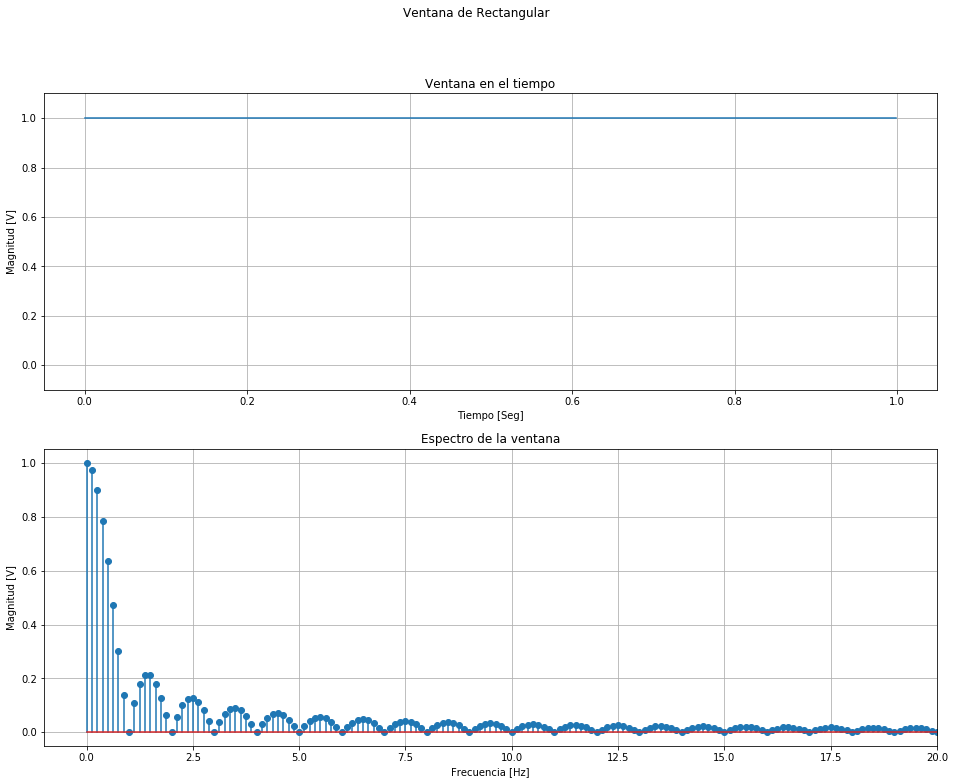

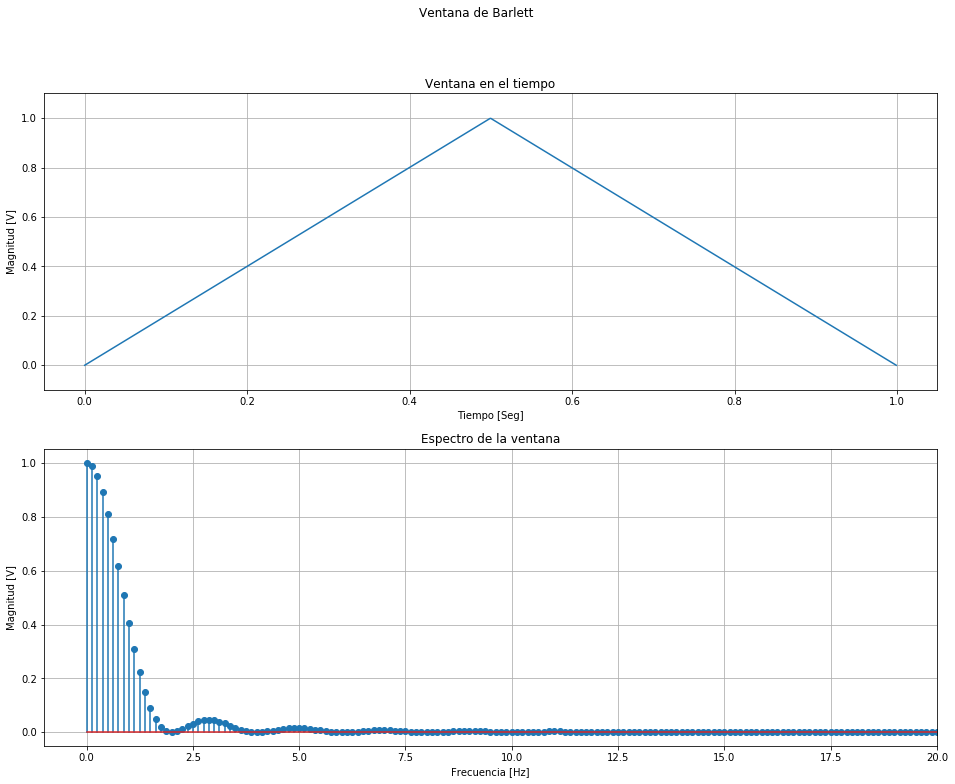

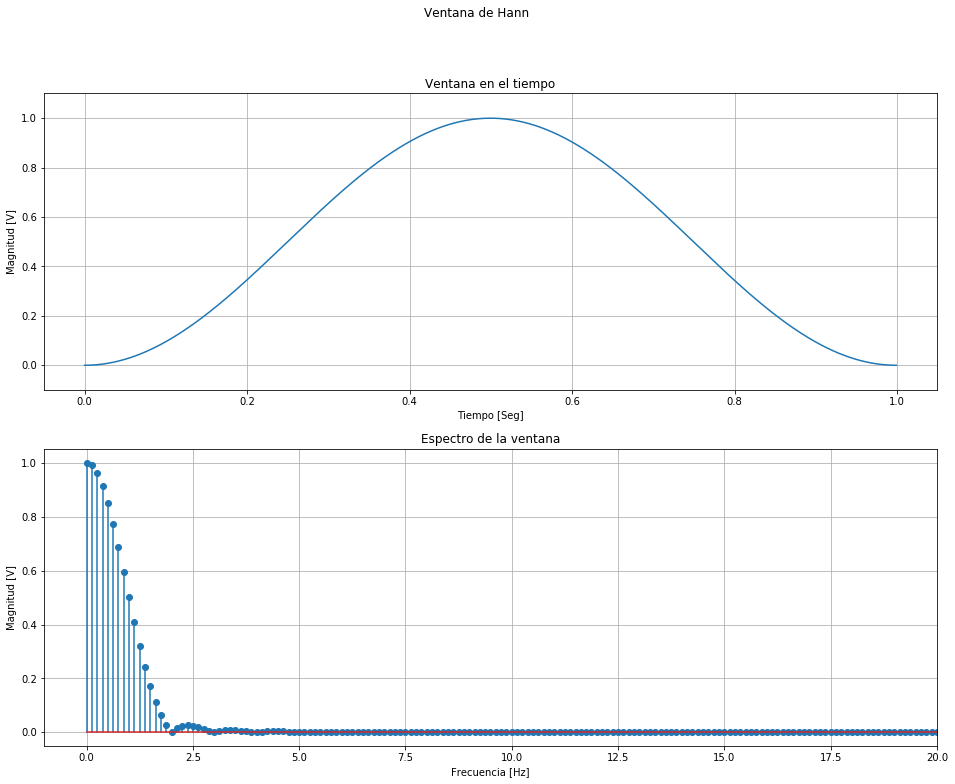

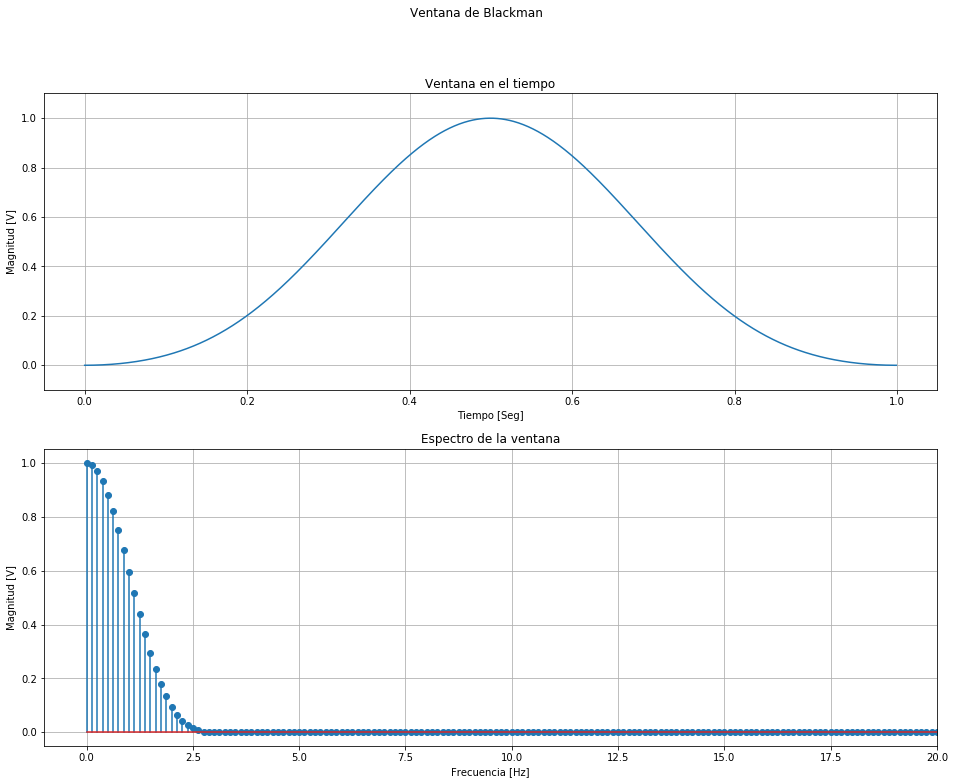

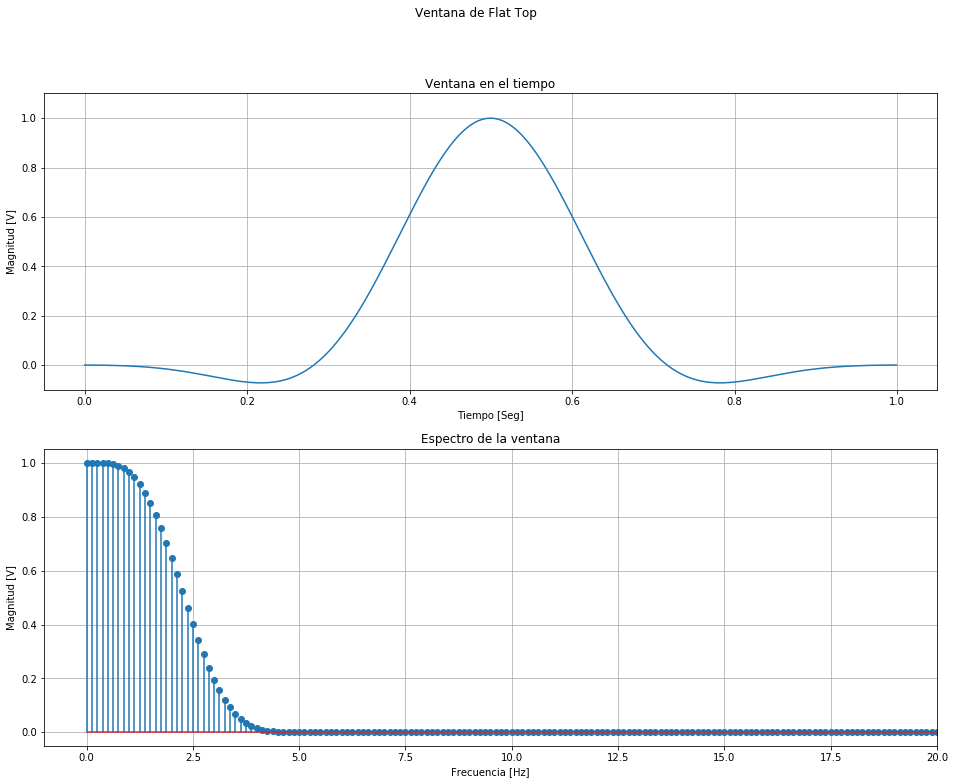

In [150]:
# Se agregan (padding - 1)*N ceros para visualizar mejor el espectro de la ventana
padding = 8

df_padding = fs/(padding*N)
ff_padding = np.linspace(0, ((padding*N-1)*df_padding), int(padding*N))

ventanas = []
ventanas_label = []
freq_lobulo_p = []
maximo_segundo_lobulo = []

# Generacion de señales
ventanas.append(np.ones(N))
ventanas_label.append('Rectangular')
ventanas.append(barlett(N))
ventanas_label.append('Barlett')
ventanas.append(hann(N))
ventanas_label.append('Hann')
ventanas.append(blackman(N))
ventanas_label.append('Blackman')
ventanas.append(flat_top(N))
ventanas_label.append('Flat Top')

for ven, label in zip(ventanas, ventanas_label):

    sig = np.concatenate((ven, np.zeros((padding-1)*N)))
    spectrum = spectrum_analyzer(sig, fs, padding*N, plot = False)
    
    # Encuentro el ancho del lobulo principal
    fc = np.where((np.abs(spectrum[0:int(N//2+1)])/np.max(np.abs(spectrum[0:int(N//2+1)]))) < (np.sqrt(2)/2))
    freq_lobulo_p.append(ff_padding[fc[0][0]]/fs)
    
    # Encuentro la magnitud del lobulo secundario
    cero = np.where((np.abs(spectrum[0:int(N//2+1)])/np.max(np.abs(spectrum[0:int(N//2+1)]))) < 0.001)
    maximo_segundo_lobulo.append(20*np.log10(np.max(np.abs(spectrum[cero[0][0]:int(N//2+1)]))/np.max(np.abs(spectrum[0:int(N//2+1)])) + np.finfo(float).eps))
                  
    plt.figure(figsize = (16, 12))
    plt.suptitle('Ventana de ' + label)

    plt.subplot(2,1,1)
    plt.plot(tt, ven)
    plt.ylim(-0.1, 1.1)
    plt.title('Ventana en el tiempo')
    plt.ylabel('Magnitud [V]')
    plt.xlabel('Tiempo [Seg]')
    plt.grid()

    plt.subplot(2,1,2)
    # Esta normalizado en magnitud el espectro
    plt.stem(ff_padding[0:int((padding*N)//2+1)], 2.0/(N) * np.abs(spectrum[0:int((padding*N)//2+1)])/(2.0/(N) * np.max(np.abs(spectrum))))
    plt.title('Espectro de la ventana')
    plt.xlim(-1,20)
    plt.ylabel('Magnitud [V]')
    plt.xlabel('Frecuencia [Hz]')
    plt.grid()


<div class="alert alert-block alert-warning">
<b>Nota:</b> En los gráficos anteriores se utilizó la técnica de zero padding para mejorar la resolución espectral. A su vez se normalizó en magnitud los espectros.
</div>

b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [151]:
tus_resultados = [ 
                   ["%.5f" % (freq_lobulo_p[0]) + "$. fs$", "%.2f" % (maximo_segundo_lobulo[0]) + " $dB$"], # <-- acá debería haber numeritos :)
                   ["%.5f" %  (freq_lobulo_p[1]) + "$. fs$", "%.2f" % (maximo_segundo_lobulo[1]) + " $dB$"], # <-- acá debería haber numeritos :)
                   ["%.5f" % (freq_lobulo_p[2]) + "$. fs$", "%.2f" % (maximo_segundo_lobulo[2]) + " $dB$"], # <-- acá debería haber numeritos :)
                   ["%.5f" % (freq_lobulo_p[3]) + "$. fs$", "%.2f" % (maximo_segundo_lobulo[3]) + " $dB$"], # <-- acá debería haber numeritos :)
                   ["%.5f" % (freq_lobulo_p[4]) + "$. fs$", "%.2f" % (maximo_segundo_lobulo[4]) + " $dB$"] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,0.00050$. fs$,-13.40 $dB$
Bartlett,0.00075$. fs$,-26.53 $dB$
Hann,0.00075$. fs$,-31.47 $dB$
Blackman,0.00088$. fs$,-58.26 $dB$
Flat-top,0.00187$. fs$,-63.99 $dB$


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

In [152]:
a1 = 1
a2 = pow(10, -2)*a1

f01 = fs/4
f02 = f01 + 10*fs/(N)

x1 = generador_senoidal(fs, f01, N, a1)
x2 = generador_senoidal(fs, f02, N, a2)
signal = x1 + x2

spectrum = spectrum_analyzer(signal, fs, N, plot = False)

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

(150, 350)

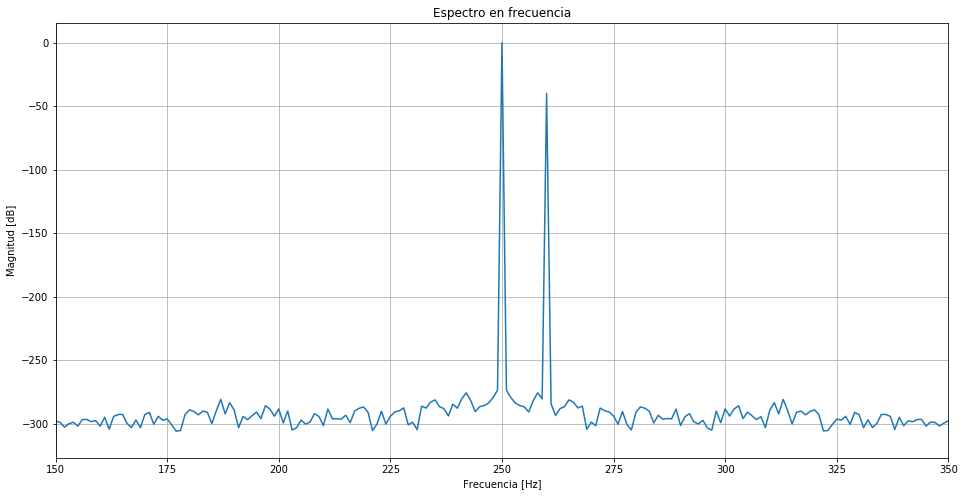

In [153]:
plt.figure(figsize = (16, 8))
plt.grid()
plt.title('Espectro en frecuencia')
plt.plot(ff[0:int(N//2+1)], 20*np.log10(2.0/N * np.abs(spectrum[0:int(N//2+1)]) + np.finfo(float).eps))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.xlim((150,350))

<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

(150, 350)

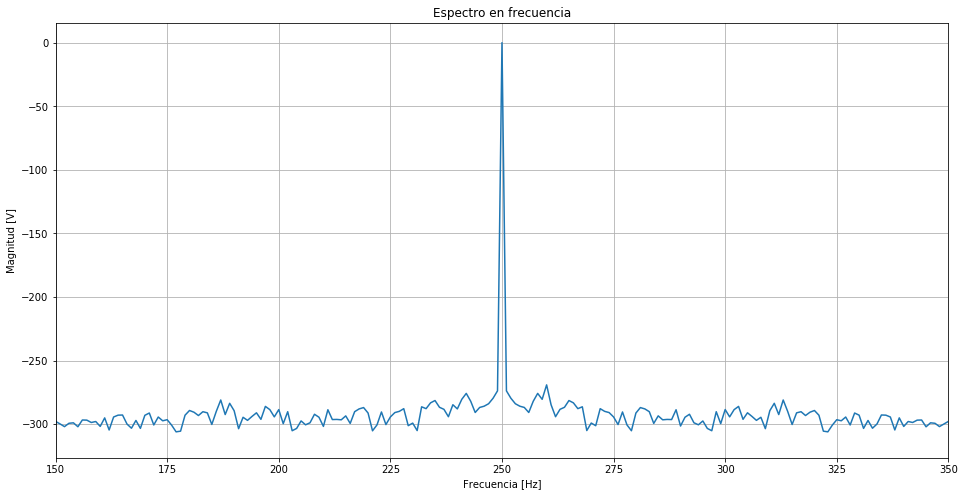

In [154]:
a2 = pow(10, -13.5)*a1

x2 = generador_senoidal(fs, f02, N, a2)
signal2 = x1 + x2

spectrum = spectrum_analyzer(signal2, fs, N, plot = False)

plt.figure(figsize = (16, 8))
plt.grid()
plt.title('Espectro en frecuencia')
plt.plot(ff[0:int(N//2+1)], 20*np.log10(2.0/N * np.abs(spectrum[0:int(N//2+1)]) + np.finfo(float).eps))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [V]')
plt.xlim((150,350))

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se observa que el segundo tono no puede tener una amplitud menor a -270 dB ya que quedaría por debajo del ruido.
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso, al no haber leackage, depende unicamente de la precisión dada por la arquitectura de la computadora.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

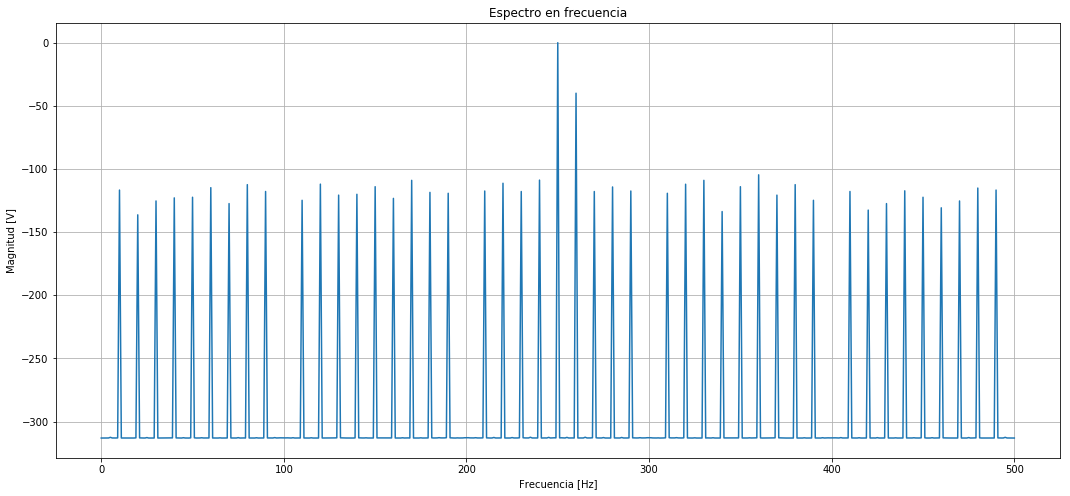

In [155]:
signal = signal/np.max(signal)
signal_q = quantizer(signal, 16, 2)
spectrum = spectrum_analyzer(signal_q, fs, N, plot = False)

plt.figure(figsize = (18, 8))
plt.title('Espectro en frecuencia')
plt.plot(ff[0:int(N//2+1)], 20*np.log10(2.0/N * np.abs(spectrum[0:int(N//2+1)]) + np.finfo(float).eps))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [V]')
#    plt.xlim((156,356))
plt.grid()

<div class="alert alert-block alert-warning">
<b>Respuesta:</b>  El piso de ruido sube notablemente hasta $-105 dB$ aproximadamente. En este caso, el ruido de cuantificación es deterministico debido a la naturaleza también deterministica de la señal de entrada.
</div>

<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

,$a_2$ (dB)
leve,-50.00 $dB$
moderada,-24.00 $dB$
máxima,-28.00 $dB$


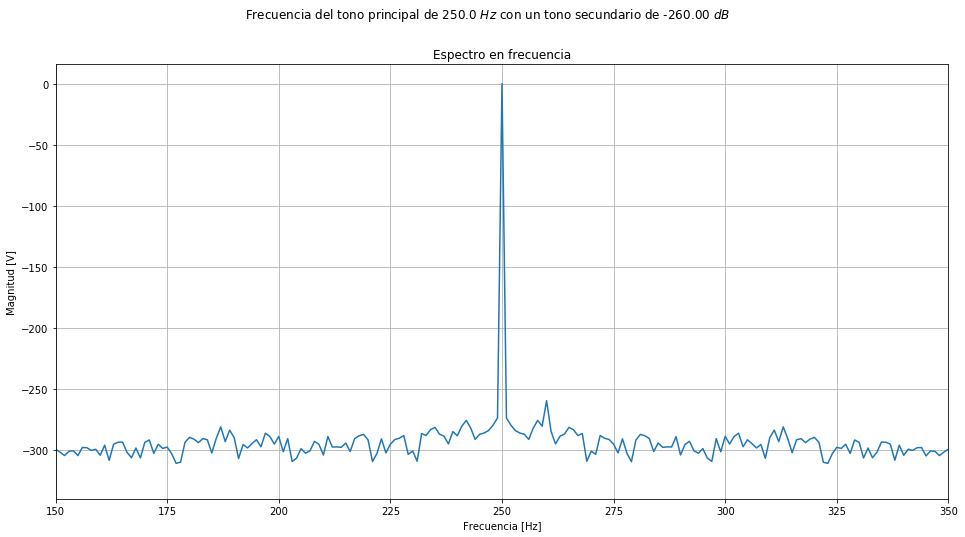

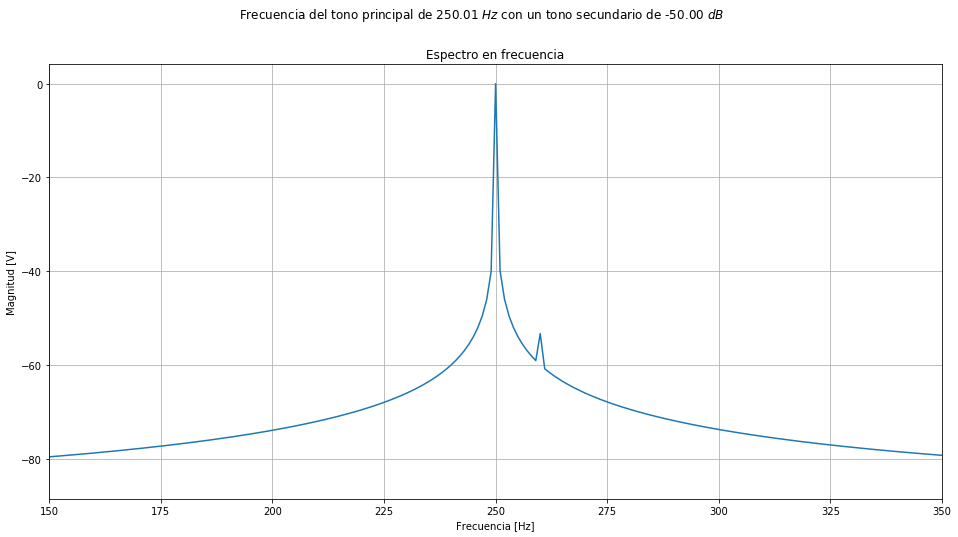

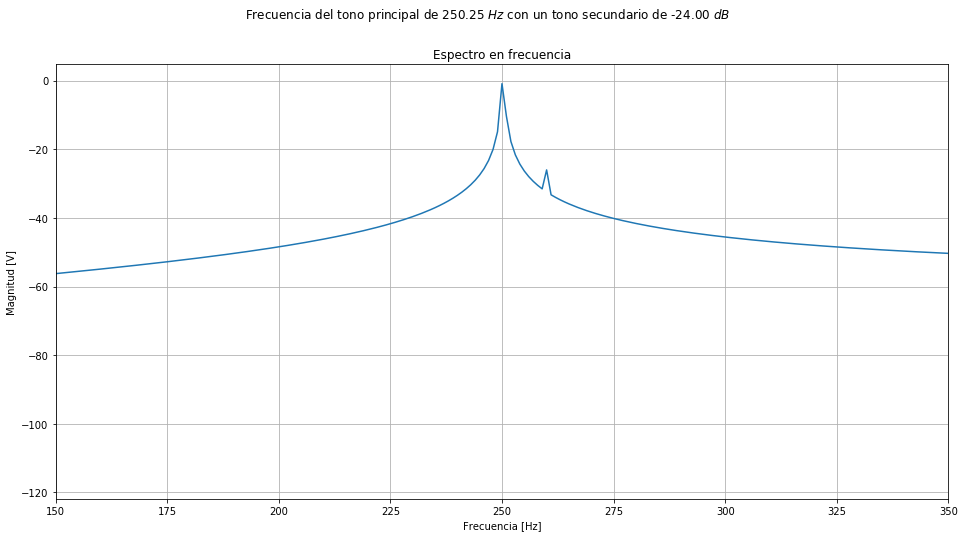

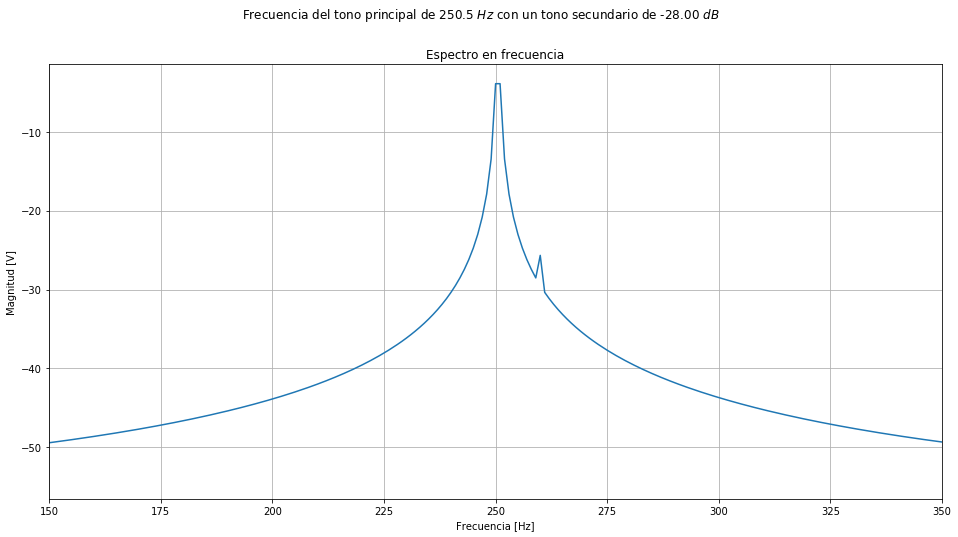

In [156]:
d1=(0, 0.01, 0.25, 0.5)
a = (pow(10, -13)*a1, pow(10, -2.5)*a1, pow(10, -1.2)*a1, pow(10, -1.4)*a1)

for freq_offset, amp in zip(d1, a):
    x1 = generador_senoidal(fs, f01 + freq_offset*fs/N, N, a1)
    x2 = generador_senoidal(fs, f02, N, amp)
    signal = x1 + x2
    spectrum = spectrum_analyzer(signal, fs, N, plot = False)
    plt.figure(figsize = (16, 8))
    plt.xlabel('f')
    plt.title('Espectro en frecuencia')
    plt.plot(ff[0:int(N//2+1)], 20*np.log10(2.0/N * np.abs(spectrum[0:int(N//2+1)])))
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [V]')
    plt.xlim((150,350))
    plt.grid()
    plt.suptitle("Frecuencia del tono principal de " + str(f01+freq_offset) + " $Hz$ con un tono secundario de " + "%.2f" % (20*np.log10(amp)) + " $dB$")   


#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   "%.2f" % (20*np.log10(a[1])) + " $dB$", # <-- acá debería haber numeritos :)
                   "%.2f" % (20*np.log10(a[2])) + " $dB$", # <-- acá debería haber numeritos :)
                   "%.2f" % (20*np.log10(a[3])) + " $dB$" # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

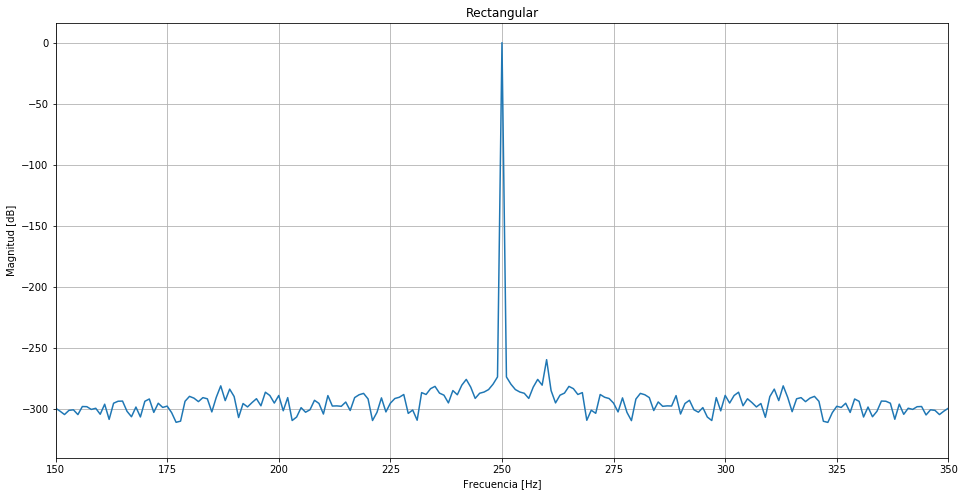

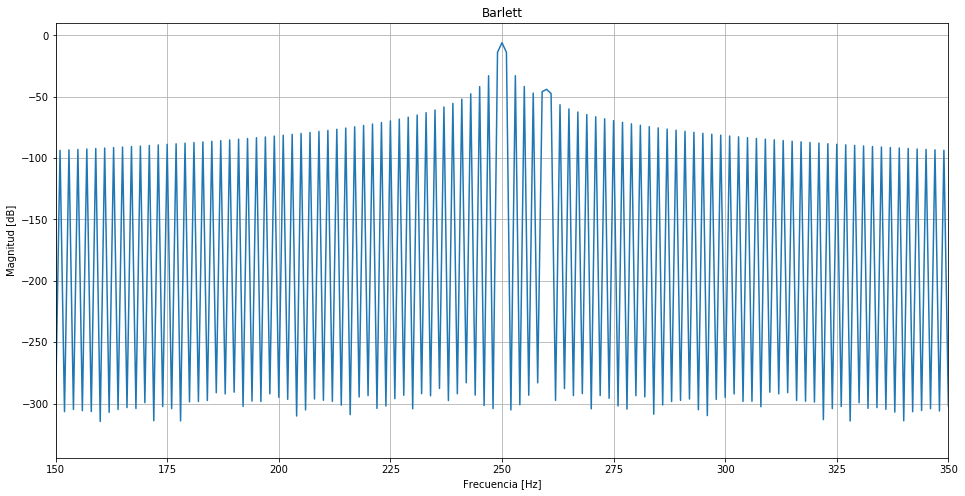

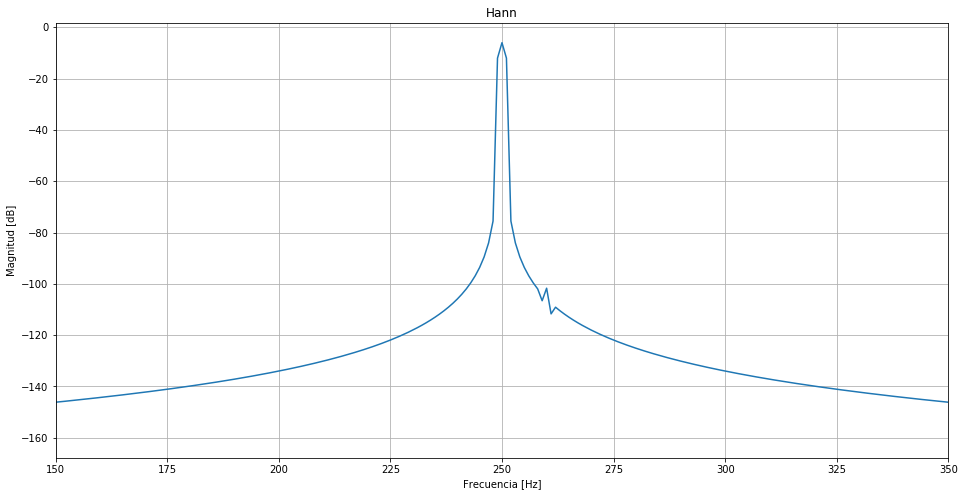

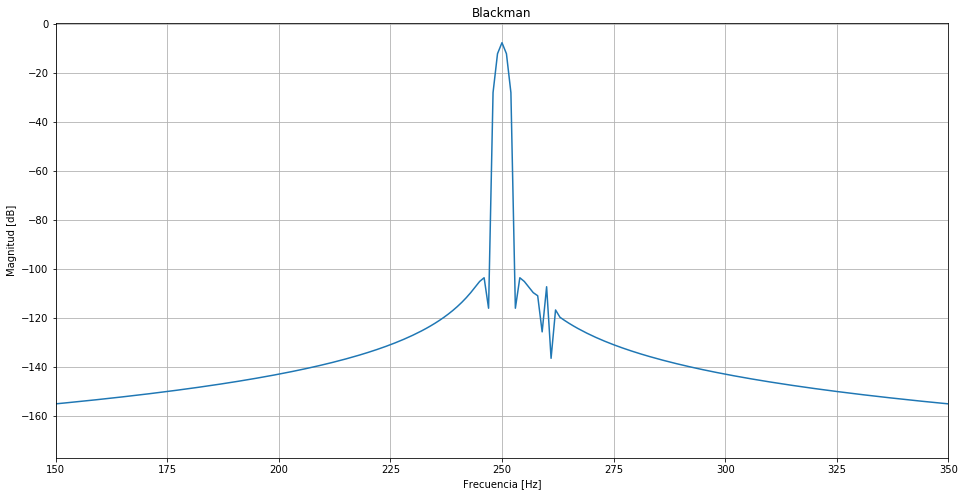

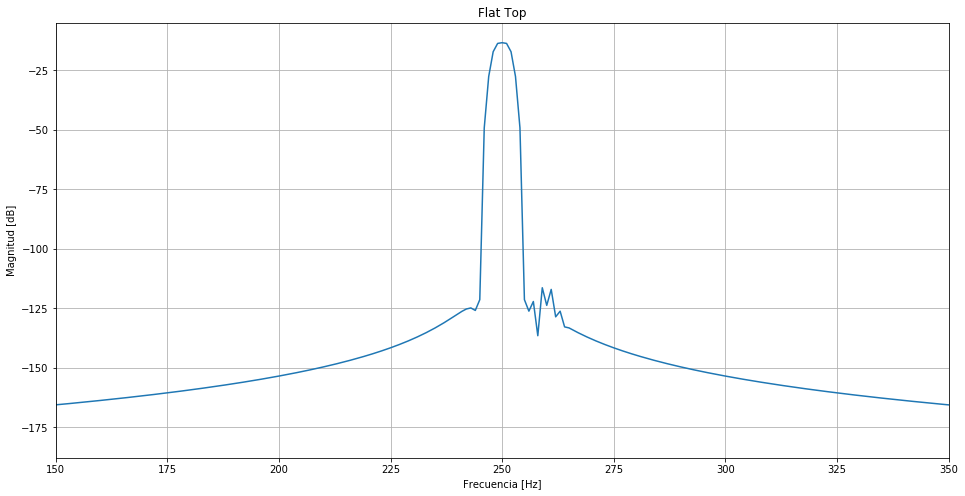

In [157]:
# Calculo de a2_1
a1 = 1
a2_0 = (pow(10, -13)*a1, pow(10, -1.9)*a1, pow(10, -5.2)*a1, pow(10, -5.2)*a1, pow(10, -5.3)*a1)

f01 = fs/4
f02 = f01 + 10*fs/(N)

x1 = generador_senoidal(fs, f01, N, a1)

for window, label, amp in zip(ventanas, ventanas_label, a2_0):
    
    plt.figure(figsize = (16, 8))
    x2 = generador_senoidal(fs, f02, N, amp)
    signal = x1 + x2
    spectrum = spectrum_analyzer(signal*window, fs, N, plot = False)
    plt.title(label)
    plt.plot(ff[0:int(N//2+1)], 20*np.log10(2.0/N * np.abs(spectrum[0:int(N//2+1)])))
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dB]')
    plt.xlim((150,350))
    plt.grid()



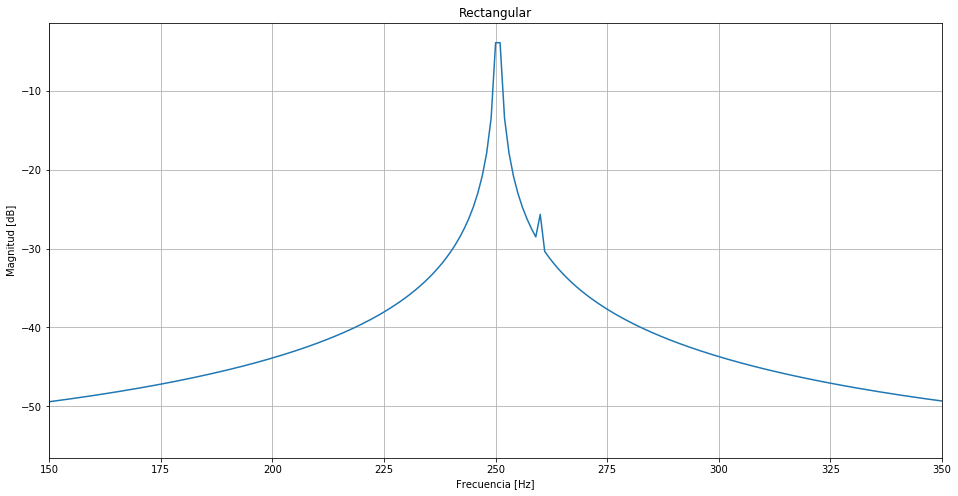

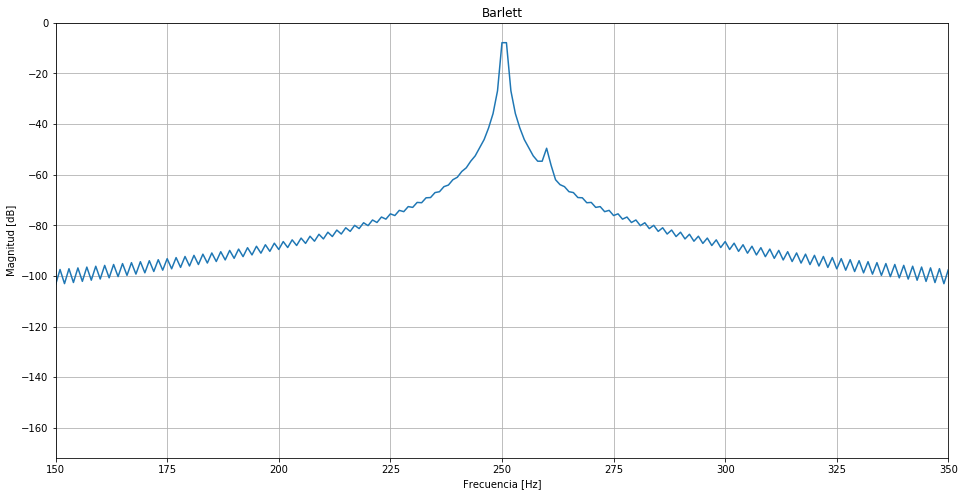

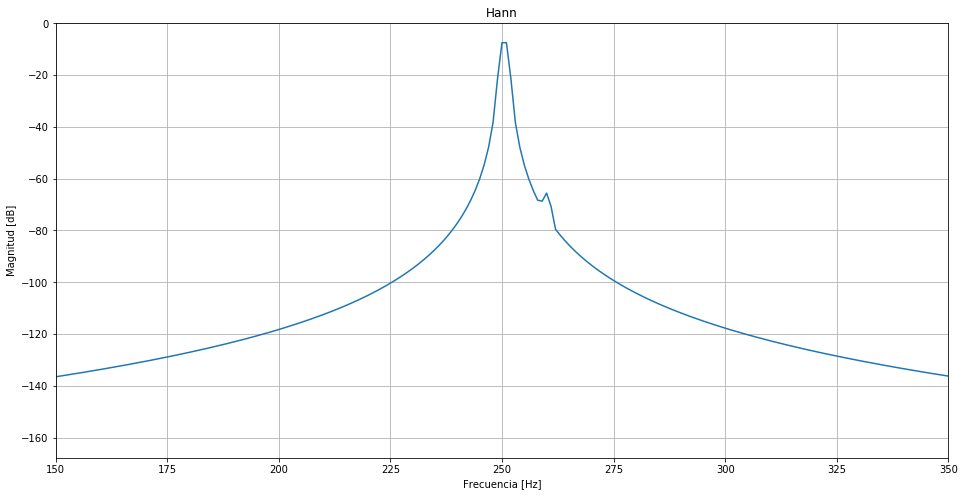

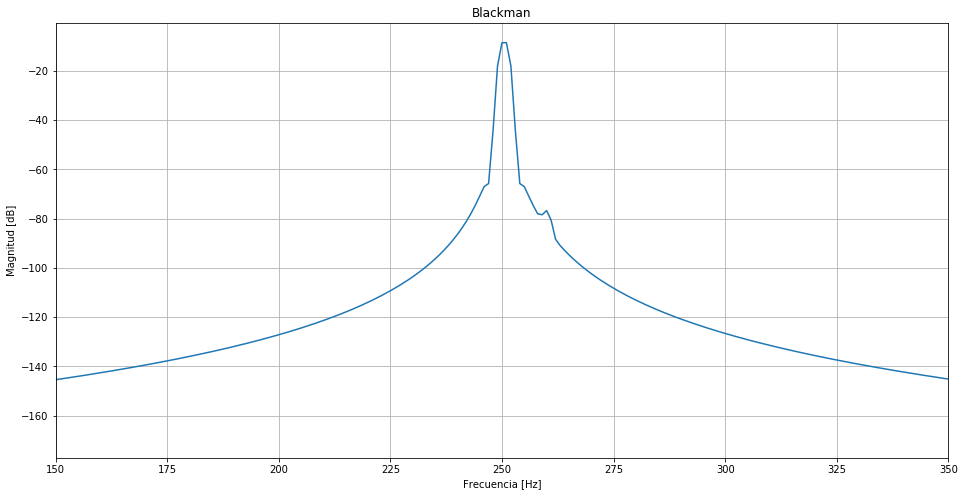

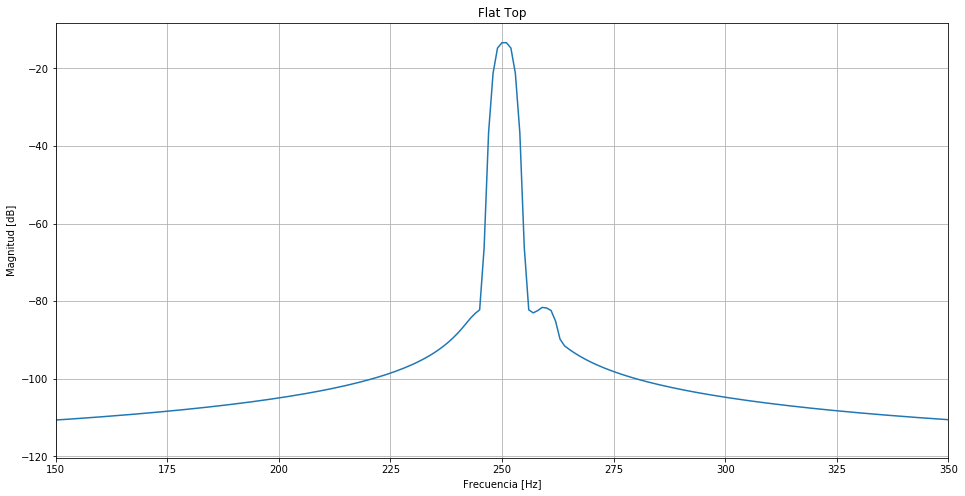

In [158]:
# Calculo de a2_1
a1 = 1
a2_1 = (pow(10, -1.4)*a1, pow(10, -2.2)*a1, pow(10, -3)*a1, pow(10, -3.5)*a1, pow(10, -3.5)*a1)

f01 = fs/4 + 0.5*fs/N

x1 = generador_senoidal(fs, f01, N, a1)

for window, label, amp in zip(ventanas, ventanas_label, a2_1):
    
    plt.figure(figsize = (16, 8))
    x2 = generador_senoidal(fs, f02, N, amp)
    signal = x1 + x2
    spectrum = spectrum_analyzer(signal*window, fs, N, plot = False)
    plt.title(label)
    plt.plot(ff[0:int(N//2+1)], 20*np.log10(2.0/N * np.abs(spectrum[0:int(N//2+1)])))
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dB]')
    plt.xlim((150,350))
    plt.grid()

In [159]:
tus_resultados = [ 
                   ["%.2f" % (20*np.log10(a2_0[0])) + " $dB$", "%.2f" % (20*np.log10(a2_1[0])) + " $dB$"], # <-- acá debería haber numeritos :)
                   ["%.2f" % (20*np.log10(a2_0[1])) + " $dB$", "%.2f" % (20*np.log10(a2_1[1])) + " $dB$"], # <-- acá debería haber numeritos :)
                   ["%.2f" % (20*np.log10(a2_0[2])) + " $dB$", "%.2f" % (20*np.log10(a2_1[2])) + " $dB$"], # <-- acá debería haber numeritos :)
                   ["%.2f" % (20*np.log10(a2_0[3])) + " $dB$", "%.2f" % (20*np.log10(a2_1[3])) + " $dB$"], # <-- acá debería haber numeritos :)
                   ["%.2f" % (20*np.log10(a2_0[4])) + " $dB$", "%.2f" % (20*np.log10(a2_1[4])) + " $dB$"] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,-260.00 $dB$,-28.00 $dB$
Bartlett,-38.00 $dB$,-44.00 $dB$
Hann,-104.00 $dB$,-60.00 $dB$
Blackman,-104.00 $dB$,-70.00 $dB$
Flat-top,-106.00 $dB$,-70.00 $dB$


<div class="alert alert-block alert-warning">
<b>Respuesta:</b>  Analizando los resultados, se ve una clara ventaja de la ventana rectangular cuando el tono principal esta perfectamente sintonizado. En este caso, la triangular es la de peor desempeño.  

Sin embargo, cuando existe una desintonía en el tono principal, se observa como el uso de ventanas no rectangulares cobra sentido. En la práctica, es muy poco probable que las señales esten en sintonía con la frecuencia de muestreo, por este motivo el uso de ventanas no rectangulares es muy importante.
</div>

<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

,$\Omega_0$ (#)
Rectangular,0.0613 $rad$
Bartlett,0.0204 $rad$
Hann,0.0173 $rad$
Blackman,0.0141 $rad$
Flat-top,0.0204 $rad$


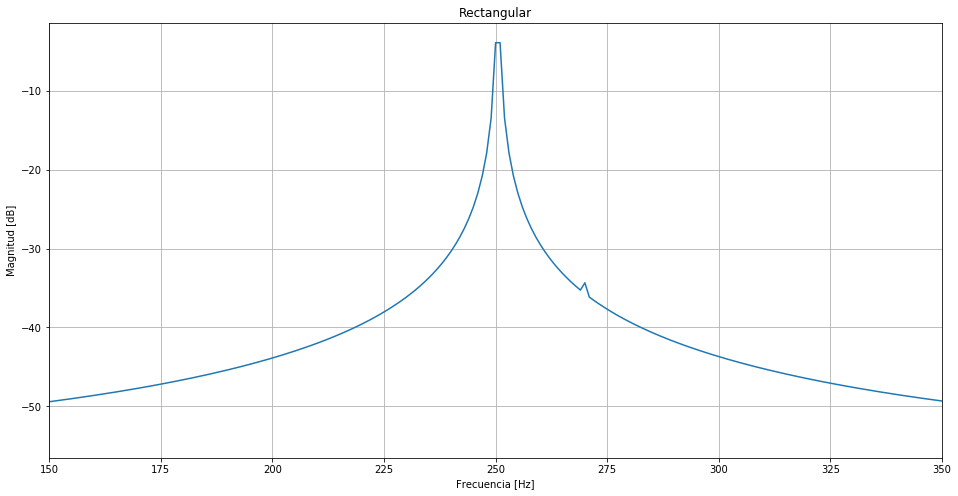

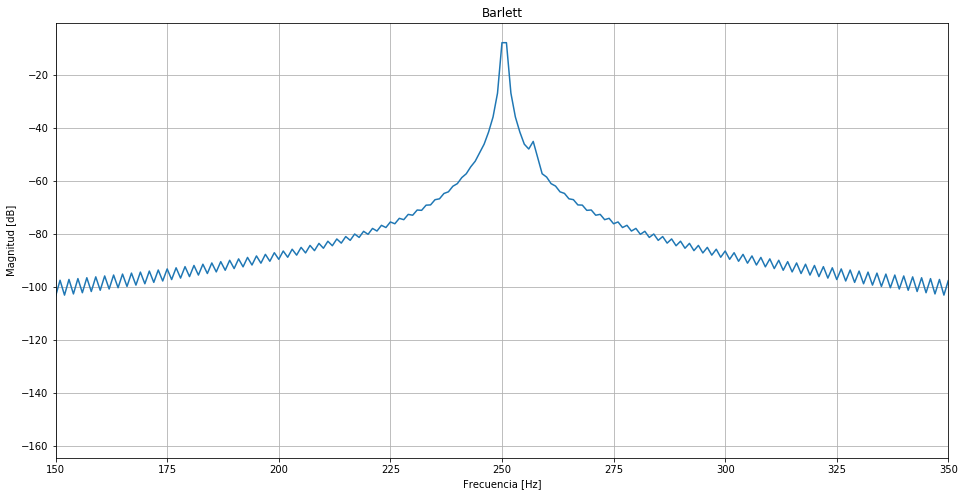

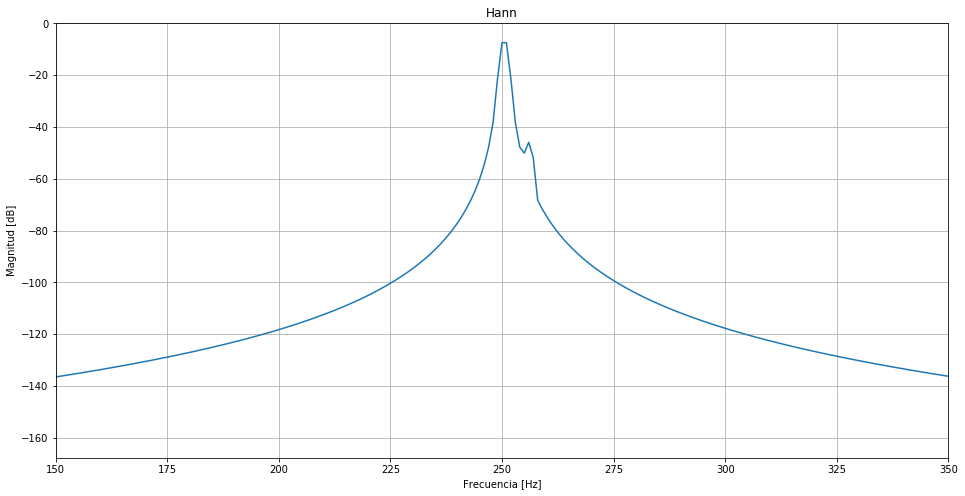

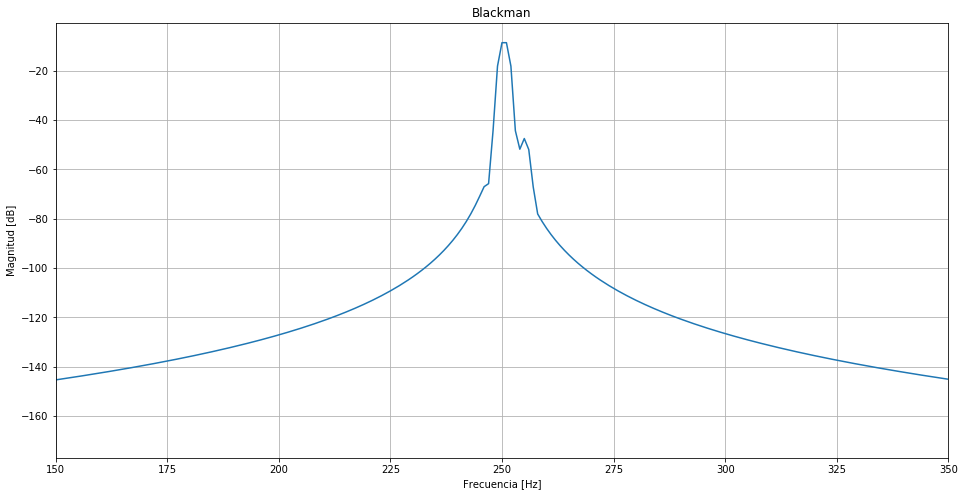

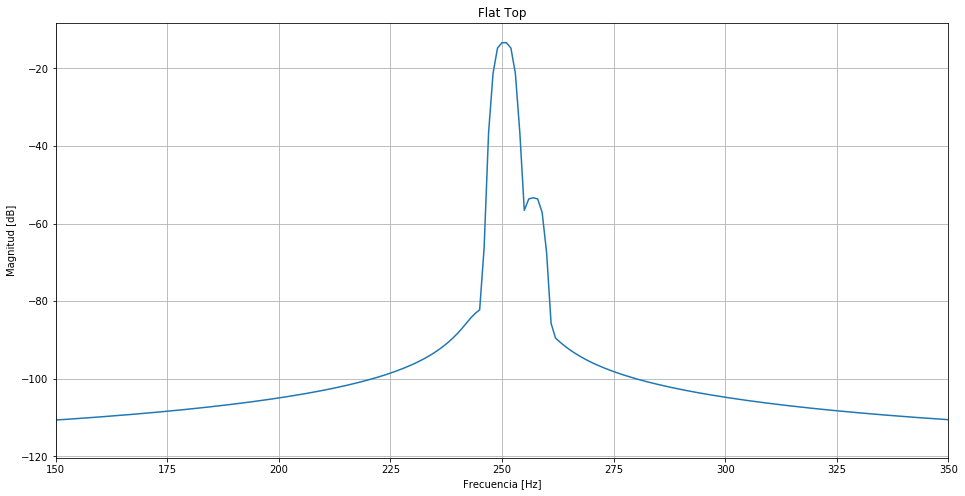

In [160]:
a1 = 1
a2 = pow(10, -2)*a1

f02 = (270, 257, 256, 255, 257)
f01 = fs/4 + 0.5*fs/N

x1 = generador_senoidal(fs, f01, N, a1)

for window, label, freq in zip(ventanas, ventanas_label, f02):
    
    plt.figure(figsize = (16, 8))
    x2 = generador_senoidal(fs, freq, N, a2)
    signal = x1 + x2
    spectrum = spectrum_analyzer(signal*window, fs, N, plot = False)
    plt.title(label)
    plt.plot(ff[0:int(N//2+1)], 20*np.log10(2.0/N * np.abs(spectrum[0:int(N//2+1)])))
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dB]')
    plt.xlim((150,350))
    plt.grid()

tus_resultados = [ 
                   "%.4f" % ((f02[0]-f01)*np.pi/fs) + " $rad$", # <-- acá debería haber numeritos :)
                   "%.4f" % ((f02[1]-f01)*np.pi/fs) + " $rad$", # <-- acá debería haber numeritos :)
                   "%.4f" % ((f02[2]-f01)*np.pi/fs) + " $rad$", # <-- acá debería haber numeritos :)
                   "%.4f" % ((f02[3]-f01)*np.pi/fs) + " $rad$", # <-- acá debería haber numeritos :)
                   "%.4f" % ((f02[4]-f01)*np.pi/fs) + " $rad$" # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

,$s_a$,$v_a$
Rectangular,-1.203247,0.418189
Bartlett,-1.510526,0.125990
Hann,-1.455415,0.113301
Blackman,-1.481888,0.061034
Flat-top,-1.600737,0.001658


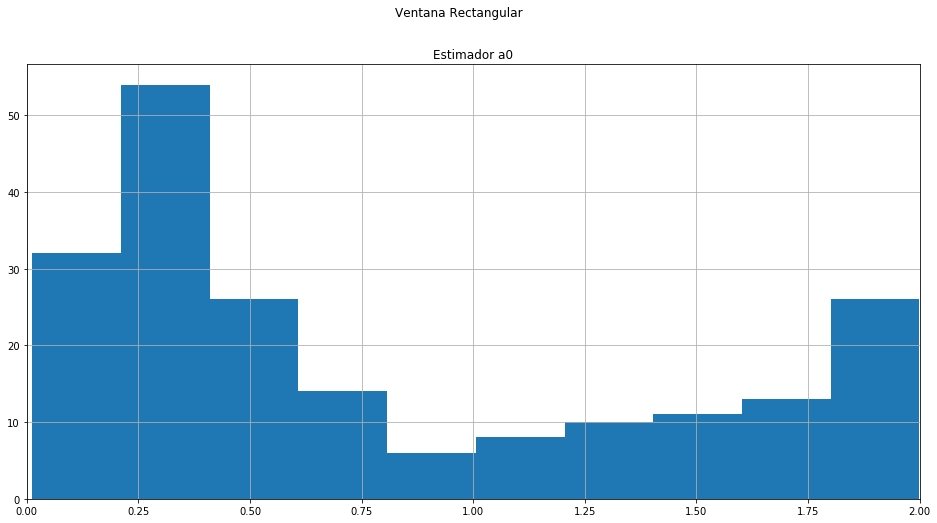

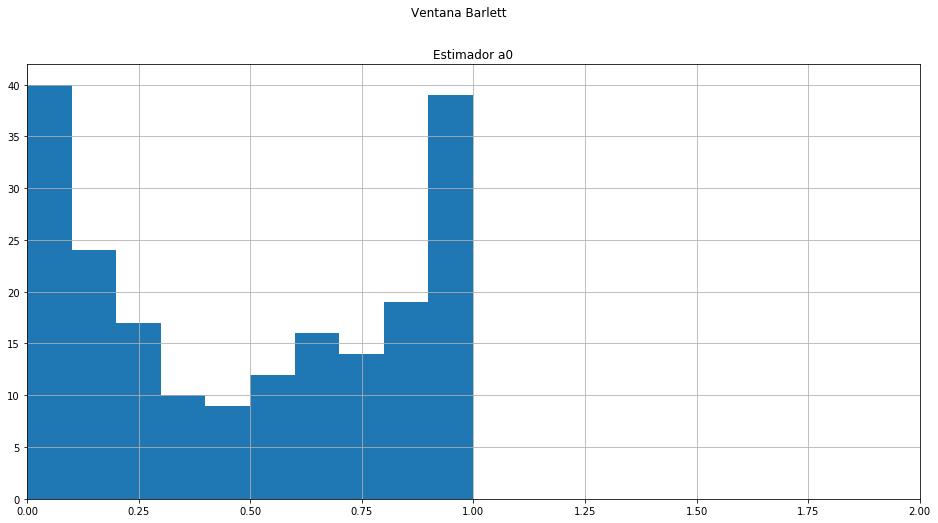

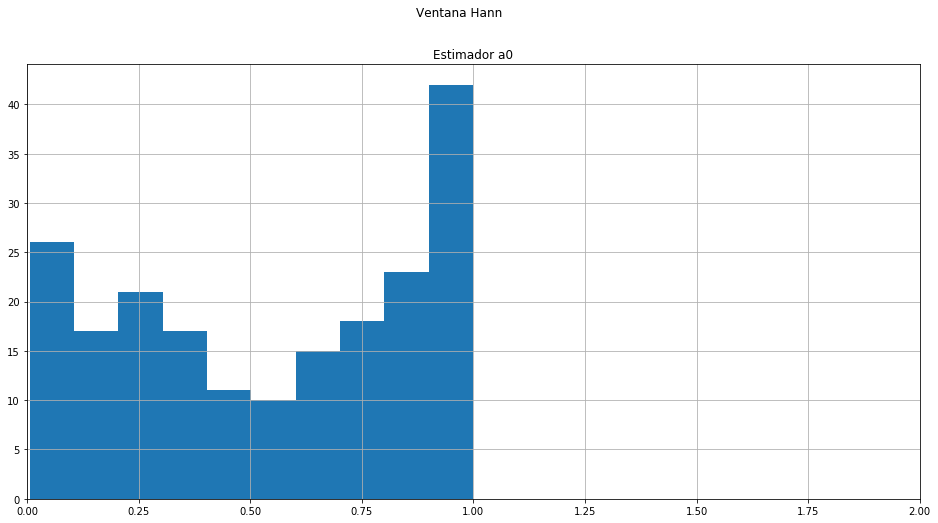

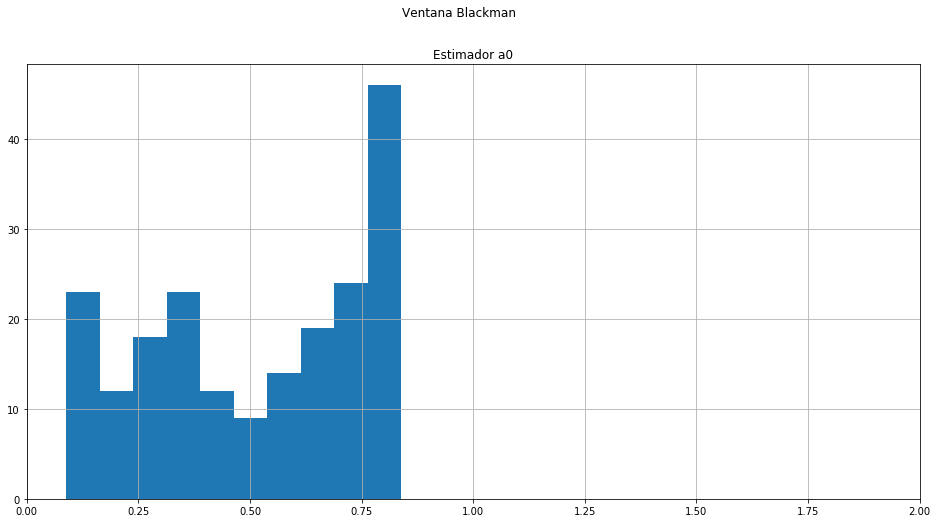

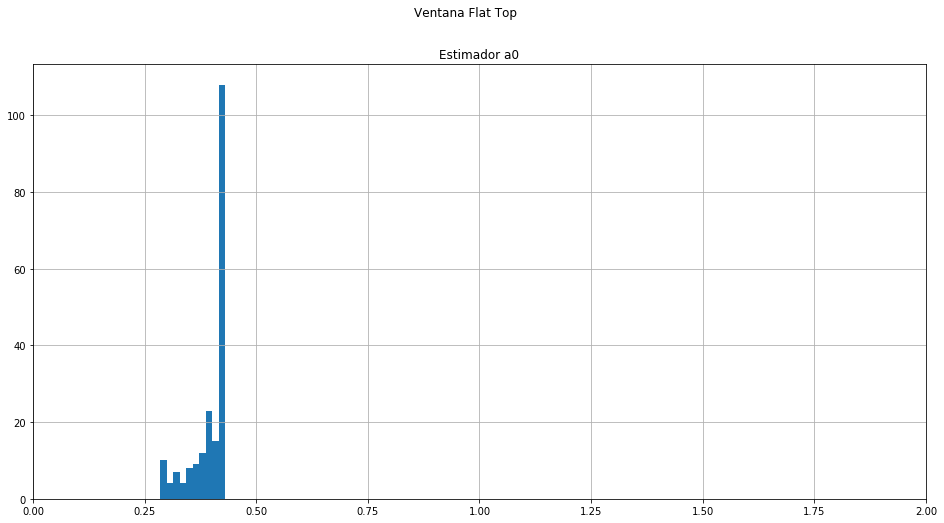

In [161]:
a0 = 2
f0 = fs/4
estimador_a0 = []
sesgo_a0 = []
varianza_a0 = []

m_f0 = int(N*(f0)/fs)

df = fs/N

aux, fr = generador_ruido(fs, 200, low = -2, high = 2, distribution = 'Uniform')

for window, label in zip(ventanas, ventanas_label):
    
    estimador_a0 = []
    
    for freq in fr:

        f1 = f0 + freq*df
        sig = generador_senoidal(fs, f1, N, a0)
        spectrum = spectrum_analyzer(sig*window, fs, N, plot = False)
        estimador_a0.append(np.abs(2.0/N * spectrum[m_f0]))

    valor_esperado0 = np.average(estimador_a0)
    sesgo_a0.append(valor_esperado0 - a0)
    varianza_a0.append(np.var(estimador_a0))
    plt.figure(figsize = (16, 8))
    plt.suptitle("Ventana " + label)
    plt.title("Estimador a0")
    plt.xlim((0,2))
    plt.hist(estimador_a0, bins = 10)
    plt.grid()

tus_resultados = [ 
                   [sesgo_a0[0], varianza_a0[0]], # <-- acá debería haber numeritos :)
                   [sesgo_a0[1], varianza_a0[1]], # <-- acá debería haber numeritos :)
                   [sesgo_a0[2], varianza_a0[2]], # <-- acá debería haber numeritos :)
                   [sesgo_a0[3], varianza_a0[3]], # <-- acá debería haber numeritos :)
                   [sesgo_a0[4], varianza_a0[4]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


<div class="alert alert-block alert-warning">
<b>Respuesta:</b>  Se observa como la técnica de ventaneo mejora la varianza del estimador, especialmente en el caso de la ventana flat-top. El sesgo no varía demasiado, siendo el mejor caso el de la ventana rectangular. Este parámetro se puede corregir fácilmente, en cambio la varianza no. 
</div>

<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

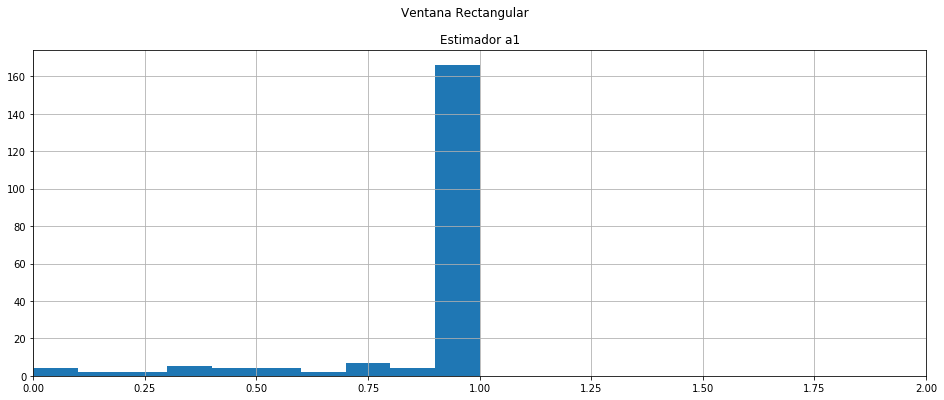

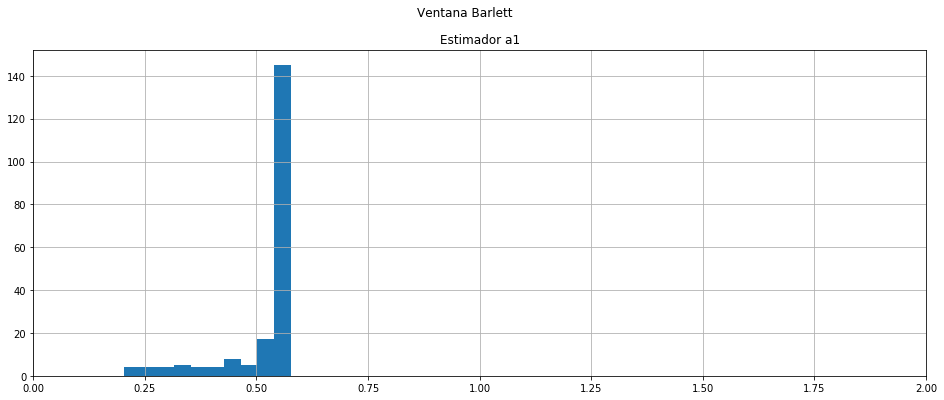

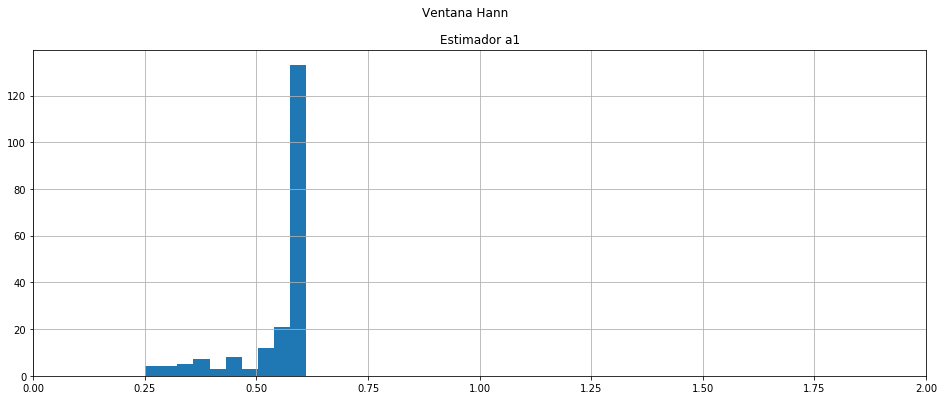

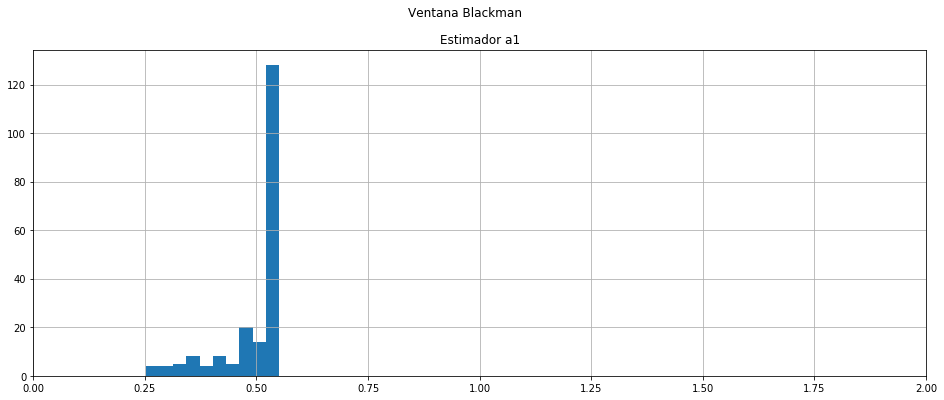

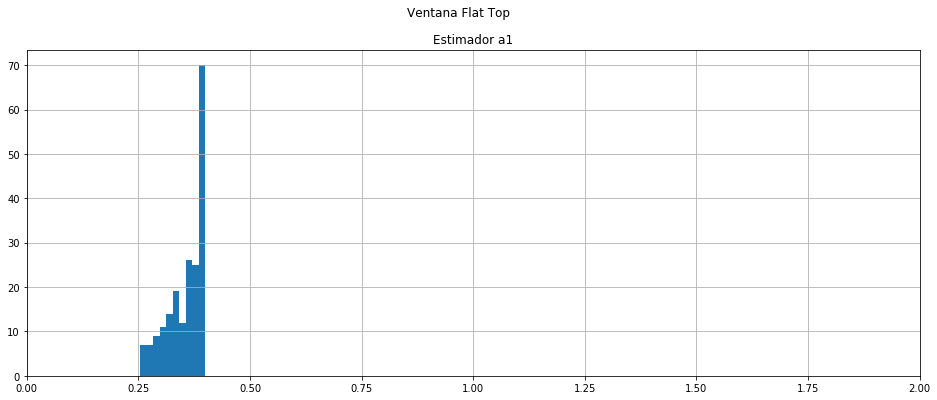

In [164]:
a0 = 2
f0 = fs/4
estimador_a1 = []
sesgo_a1 = []
varianza_a1 = []

a = m_f0 - 2
b = m_f0 + 2

m_f0 = int(N*(f0)/fs)

df = fs/N

tt, fr = generador_ruido(fs, 200, low = -2, high = 2, distribution = 'Uniform')

for window, label in zip(ventanas, ventanas_label):
    
    estimador_a1 = []
    
    for freq in fr:

        f1 = f0 + freq*df
        sig = generador_senoidal(fs, f1, N, a0)
        spectrum = spectrum_analyzer(sig*window, fs, N, plot = False)
        estimador_a1.append(rms(2.0/N * np.abs(spectrum[a:b])))

    valor_esperado1 = np.average(estimador_a1)
    sesgo_a1.append(valor_esperado1 - a0)
    varianza_a1.append(np.var(estimador_a1))
    plt.figure(figsize = (16, 6))
    plt.suptitle("Ventana " + label)
    plt.title("Estimador a1")
    plt.xlim((0,2))
    plt.hist(estimador_a1, bins = 10)
    plt.grid()

In [165]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [sesgo_a1[0], varianza_a1[0]], # <-- acá debería haber numeritos :)
                   [sesgo_a1[1], varianza_a1[1]], # <-- acá debería haber numeritos :)
                   [sesgo_a1[2], varianza_a1[2]], # <-- acá debería haber numeritos :)
                   [sesgo_a1[3], varianza_a1[3]], # <-- acá debería haber numeritos :)
                   [sesgo_a1[4], varianza_a1[4]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.111453,0.045054
Bartlett,-1.470991,0.007915
Hann,-1.440263,0.007911
Blackman,-1.499032,0.005664
Flat-top,-1.644030,0.001641


<div class="alert alert-block alert-warning">
<b>Respuesta:</b>  Se puede ver como en el caso de la ventana rectangular, la varianza del segundo estimador disminuye practicamente un orden de magnitud con respecto al primero. Con el resto de las ventanas se evidencia una mejora pero ninguna de la magnitud de la mencionada anteriormente. El caso de la flat-top es el menos beneficiado por este cambio de estimador.
</div>